In [38]:
#DOES PART POSITIONING IN THE MACHINE AFFECT MELT POOL AREA

In [54]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
#pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [55]:
# Load your dataset, replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('L0001.csv')

# Assuming your dataset has columns 'x', 'y', 'z', and 'target'
X = df[['x', 'y']]  # Features (x, y)
y = df['MPArea']      # Target values

df.head()

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
0,-6.00,16.0,100.0,2.0,7750,0.009,0.0,0,0,0.000000,...,NaN,NaN,NaN,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
1,-5.91,16.0,100.0,2.0,7760,0.009,0.0,127,14400,12.716187,...,6.324555,2.574863,41.231056,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
2,-5.82,16.0,100.0,2.0,7770,0.009,0.0,174,14400,14.884343,...,6.000000,1.570796,48.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
3,-5.73,16.0,100.0,2.0,7780,0.009,0.0,195,14400,15.756958,...,6.324555,2.976444,57.706152,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
4,-5.64,16.0,100.0,2.0,7790,0.009,0.0,201,14400,15.997536,...,6.000000,1.570796,60.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111


In [56]:
from sklearn.cluster import KMeans

# Define the number of clusters (you can adjust this based on your dataset)
num_clusters = 4 #- # of clusters
kmeans = KMeans(n_clusters = num_clusters, random_state=42) 
kmeans.fit(X) #fitting the data


KMeans(n_clusters=4, random_state=42)

In [57]:
centroids = kmeans.cluster_centers_ #calculating centroids
predicted_clusters = kmeans.labels_ #cluster colors and seperations

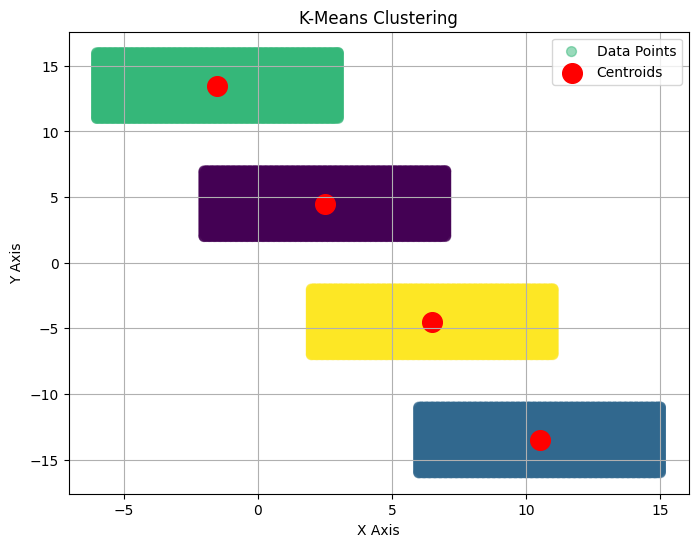

In [58]:
import matplotlib.pyplot as plt

# Scatter plot of the data points with color-coded clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['x'], X['y'], c=predicted_clusters, cmap='viridis', s=50, alpha=0.5, label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering')
plt.legend()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid(True)
plt.show()


[[  2.81693587 308.93278464]
 [  7.19274756 461.47175732]
 [  4.33746757 136.6108291 ]
 [  3.98353476 383.10809243]]


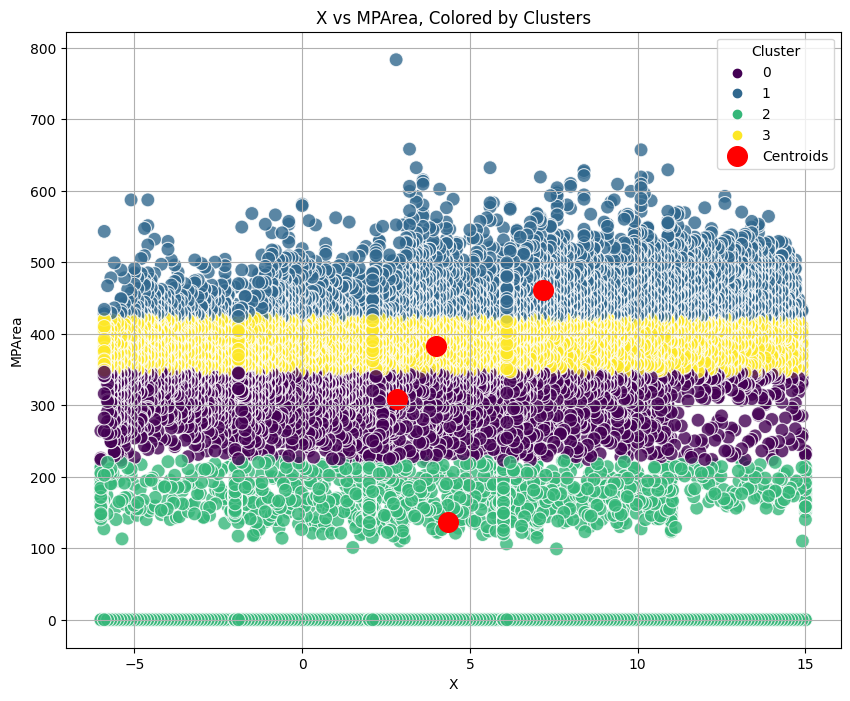

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

X1 = df[['x', 'MPArea']]

num_clusters = 4
kmeans1 = KMeans(n_clusters = num_clusters, init = 'k-means++', random_state=12, max_iter=300)
kmeans1.fit(X1)

centroids1 = kmeans1.cluster_centers_
predicted_clusters1 = kmeans1.labels_ #redo all centroid values for the new graph
print(centroids1)


# Scatter plot of 'MPArea' vs 'x', color-coded by clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='MPArea', hue=predicted_clusters1, data=df, palette='viridis', s=100, alpha=0.8) #scatter plot
#s=dot size, alpha=opacity, data=dataframe to be input
#plt.scatter(x=df['x'], y=df['MPArea'], c=predicted_clusters, cmap='viridis', s=50, alpha=0.5, label='Data Points')
plt.xlabel('X')
plt.ylabel('MPArea')
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='o', color='red', s=200, label='Centroids') #plot centroids
plt.xlabel('X')
plt.title('X vs MPArea, Colored by Clusters') #title 
plt.grid(True) #grid == true
plt.legend(title='Cluster')
plt.show()



In [72]:
len(kmeans1.labels_)


23684

In [53]:

for i, centroid in enumerate(centroids1):
    x_coord = centroid[0]
    y_coord = centroid[1]
    print(f"Centroid {i+1}: x = {x_coord}, y = {y_coord}")

first_centroid = centroids1[0] #x centroid
x_coord = first_centroid[0]
y_coord = first_centroid[1]
print(f"Coordinates of the X centroid: x = {x_coord}, y = {y_coord}")

Centroid 1: x = 2.8169358710562453, y = 308.93278463648795
Centroid 2: x = 7.19274755927476, y = 461.471757322176
Centroid 3: x = 4.337467569091936, y = 136.6108291032144
Centroid 4: x = 3.983534757807213, y = 383.10809242966286
Coordinates of the X centroid: x = 2.8169358710562453, y = 308.93278463648795


[[  5.03951615 313.21160093]
 [ -7.36936138 465.06137667]
 [  0.47352342 137.73329621]
 [  0.5019013  387.40733837]]


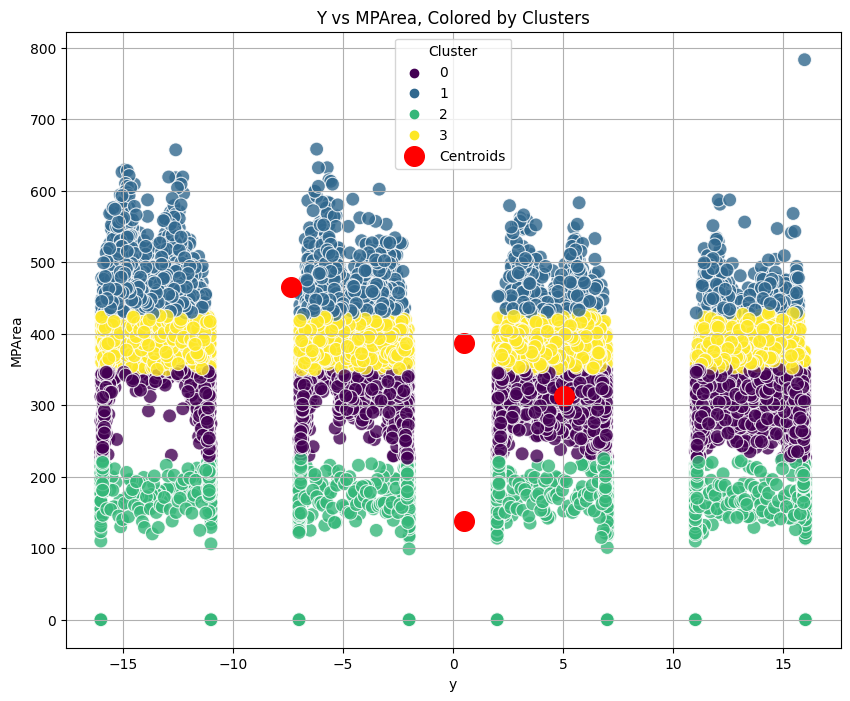

In [94]:
X2 = df[['y','MPArea']].values

kmeans2 = KMeans(n_clusters=4, random_state=0)
kmeans2.fit(X2)
centroids2 = kmeans2.cluster_centers_
predicted_clusters2=kmeans2.labels_
print(centroids2)


# Scatter plot of 'MPArea' vs 'y', color-coded by clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='y', y='MPArea', hue=predicted_clusters2, data=df, palette='viridis', s=100, alpha=0.8)
plt.xlabel('y')
plt.ylabel('MPArea')
plt.scatter(centroids2[:, 0], centroids2[:, 1], marker='o', color='red', s=200, label='Centroids')
plt.title('Y vs MPArea, Colored by Clusters')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [93]:
#ISSUE WITH CENTROIDS BEING THE SAME ON THE X VS MP AND Y VS MP GRAPHS -- is this a problem?

#SEEMS TO BE A CORRELATION BETWEEN THE Y VALUE AND MP AREA, SMALLER Y VALUE, HIGHER MP AREA
#SEEMS TO BE A CORRELATION BETWEEN THE X VALUE AND MP AREA, HIGHER X VALUE, HIGHER MP AREA

C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


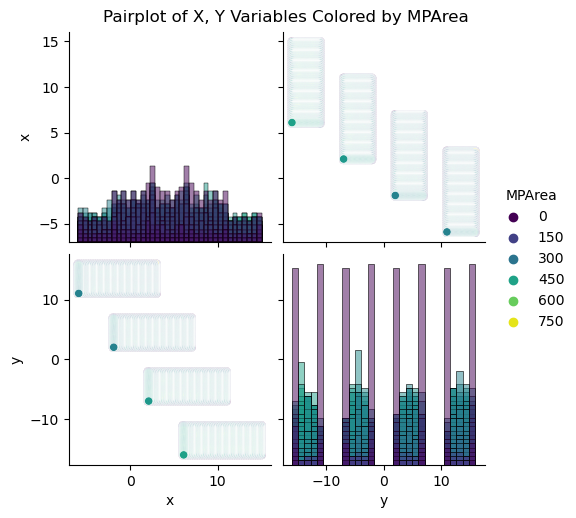

In [131]:
columns = ['x', 'y', 'MPArea']
df_subset = df[columns]


sns.pairplot(df_subset, hue='MPArea', palette='viridis', diag_kind='hist')
plt.suptitle('Pairplot of X, Y Variables Colored by MPArea', y=1.02)
plt.show()

#Scatterplots (Diagonal Elements):
#------
#Along the diagonal of the pairplot, Seaborn plots histograms (or kernel density estimates) for each variable in your dataset. 
#This helps visualize the distribution of each variable individually.


#Scatterplots (Off-diagonal Elements):
#------
#Off the diagonal, Seaborn creates scatter plots of each pair of variables against each other. 
#Each point in the scatter plot represents a single observation (row) in your dataset.
#If you pass a hue parameter to sns.pairplot, 
#it will use this variable to color-code the points in the scatter plots based on categories within that variable, making it easy to see how variables relate to each other within different groups.

In [116]:
#--------------------------

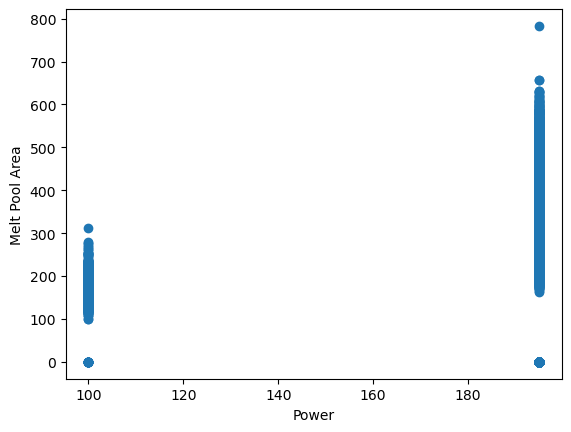

In [27]:
plt.scatter(x=df['P'],y=df['MPArea']) #higher power leads to a higher MPArea
plt.xlabel('Power')

plt.ylabel('Melt Pool Area')
plt.show()